In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and filter 

In [2]:
df = pd.read_csv('output/training_logs.csv')
# df = df[]

# shorten all runs to max 30 epochs
df = df[df['Epoch']<=30]

# drop all runs which have less than 3 epochs
df = df.groupby(['model', 'timestamp']).filter(lambda x: len(x)>=3)
df

,timestamp,model,Training Loss,Epoch,Step,Validation Loss,Accuracy,F1,model_path,samples_per_s,steps_per_s,colab,per_device_train_batch_size,per_device_eval_batch_size,split,target_map,binary
0,2024-04-03_15-00,distilbert-base-cased,0.694,1.0,780,0.647,0.737,0.438,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN,NaN
1,2024-04-03_15-00,distilbert-base-cased,0.511,2.0,1560,0.722,0.704,0.544,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN,NaN
2,2024-04-03_15-00,distilbert-base-cased,0.286,3.0,2340,0.901,0.703,0.531,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN,NaN
3,2024-04-03_15-00,distilbert-base-cased,0.160,4.0,3120,1.438,0.719,0.549,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN,NaN
4,2024-04-03_15-00,distilbert-base-cased,0.100,5.0,3900,1.663,0.709,0.528,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2024-04-08_16-48,cardiffnlp/twitter-roberta-base-sentiment-latest,0.009,9.0,2565,3.865,0.567,0.418,output/models/cardiffnlp/twitter-roberta-base-...,23.485,2.936,False,8,64,"(0.9, 0.1, 'balanced')","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False
486,2024-04-08_16-48,cardiffnlp/twitter-roberta-base-sentiment-latest,0.001,10.0,2850,3.955,0.562,0.416,output/models/cardiffnlp/twitter-roberta-base-...,23.485,2.936,False,8,64,"(0.9, 0.1, 'balanced')","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False
487,2024-04-08_20-26,michellejieli/emotion_text_classifier,0.583,1.0,1559,0.469,0.793,0.739,output/models/michellejieli/emotion_text_class...,128.725,16.093,False,8,64,"(0.8, 0.1, 0.1)","{'Pathos': 0, 'No_pathos': 1}",True
488,2024-04-08_20-26,michellejieli/emotion_text_classifier,0.488,2.0,3118,0.331,0.871,0.850,output/models/michellejieli/emotion_text_class...,128.725,16.093,False,8,64,"(0.8, 0.1, 0.1)","{'Pathos': 0, 'No_pathos': 1}",True


In [3]:
last_n_runs = 2

best = df.groupby(['model', 'timestamp'])['F1'].max()
best

# timestamp.sort_values(ascending=False).unique()[:last_n_runs]
# grouped = df[df['timestamp'].isin(last_n)].groupby(['model', 'timestamp'])
# 
# # Individual subplots
# fig, axes = plt.subplots(nrows=len(grouped.groups), ncols=1, figsize=(20, 10))
# for (group_name, group_df), ax in zip(grouped, axes):
#     group_df.plot(y=['Accuracy', 'F1', 'Training Loss', 'Validation Loss'], x='Epoch', ax=ax, title=f"{group_name}").legend(loc='upper left')
# 
# plt.tight_layout()
# plt.suptitle("Subplots")
# plt.show()

model                                                     timestamp       
HuggingFaceH4/tiny-random-LlamaForSequenceClassification  2024-04-03_21-30    0.411
                                                          2024-04-03_21-32    0.456
                                                          2024-04-08_14-25    0.607
                                                          2024-04-08_14-29    0.426
                                                          2024-04-08_14-34    0.517
                                                          2024-04-08_14-43    0.334
camembert-base                                            2024-04-03_15-05    0.270
                                                          2024-04-04_01-56    0.270
cardiffnlp/twitter-roberta-base-sentiment-latest          2024-04-04_01-14    0.583
                                                          2024-04-08_12-32    0.701
                                                          2024-04-08_12-36    0.545
 

## Check latest

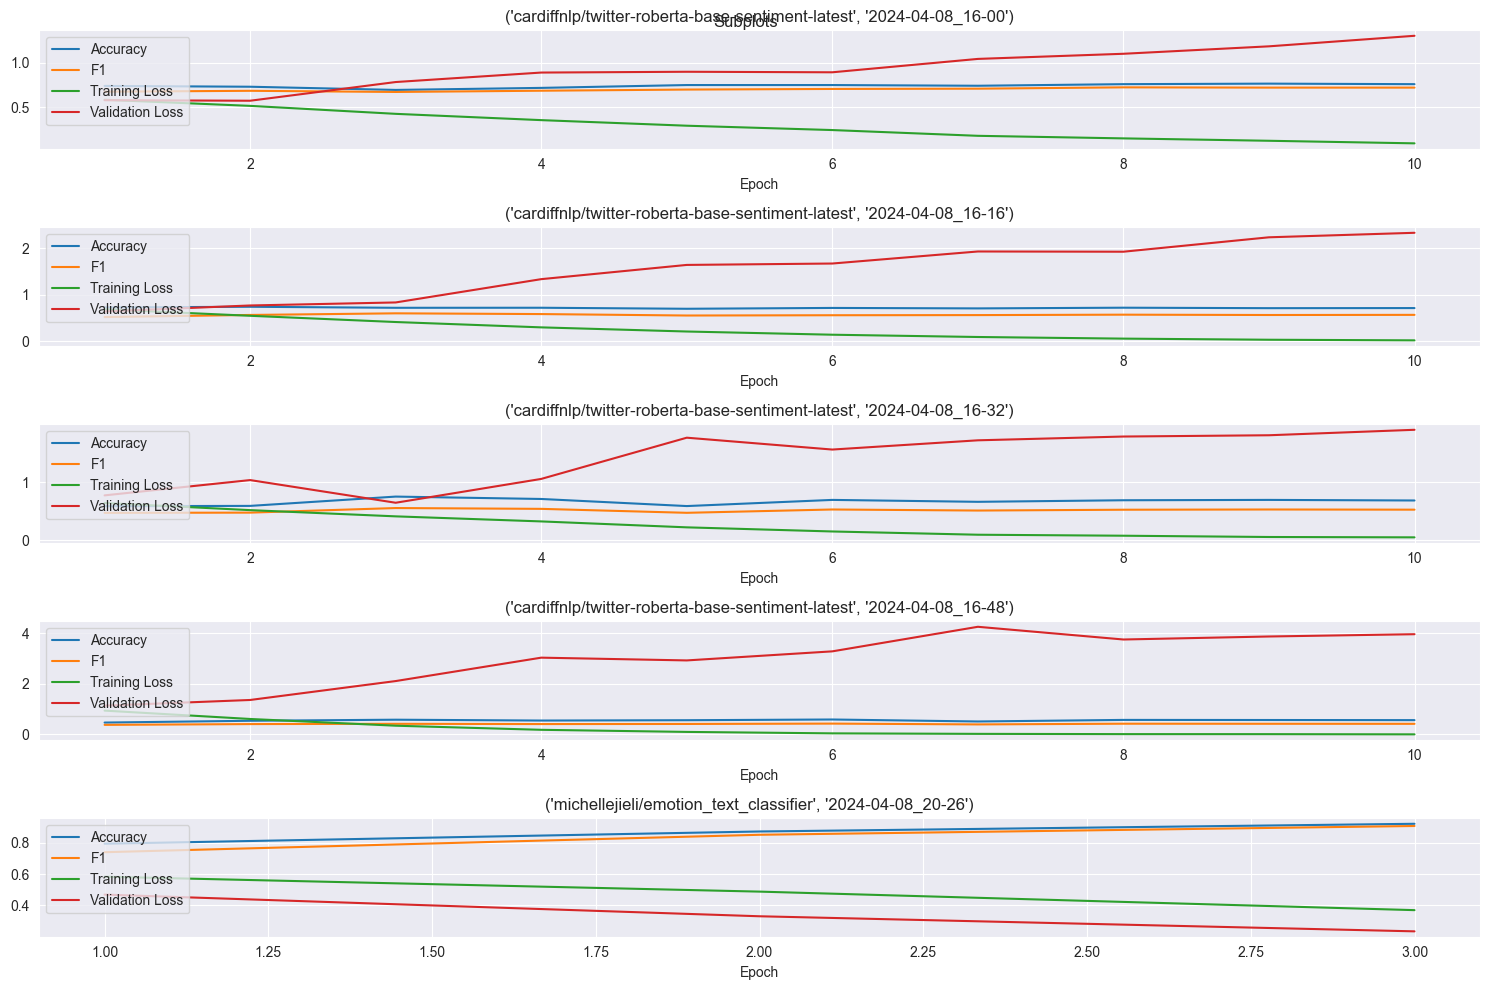

In [6]:
last_n_runs = 5

# pd.to_datetime(df.timestamp, format="%Y-%m-%d_%H-%M").sort_values(ascending=False).unique()
last_n = df.timestamp.sort_values(ascending=False).unique()[:last_n_runs]
grouped = df[df['timestamp'].isin(last_n)].groupby(['model', 'timestamp'])

# Individual subplots
fig, axes = plt.subplots(nrows=len(grouped.groups), ncols=1, figsize=(15, 10))
for (group_name, group_df), ax in zip(grouped, axes):
    group_df.plot(y=['Accuracy', 'F1', 'Training Loss', 'Validation Loss'], x='Epoch', ax=ax, title=f"{group_name}").legend(loc='upper left')

plt.tight_layout()
plt.suptitle("Subplots")
plt.show()

# Plot one feature for all

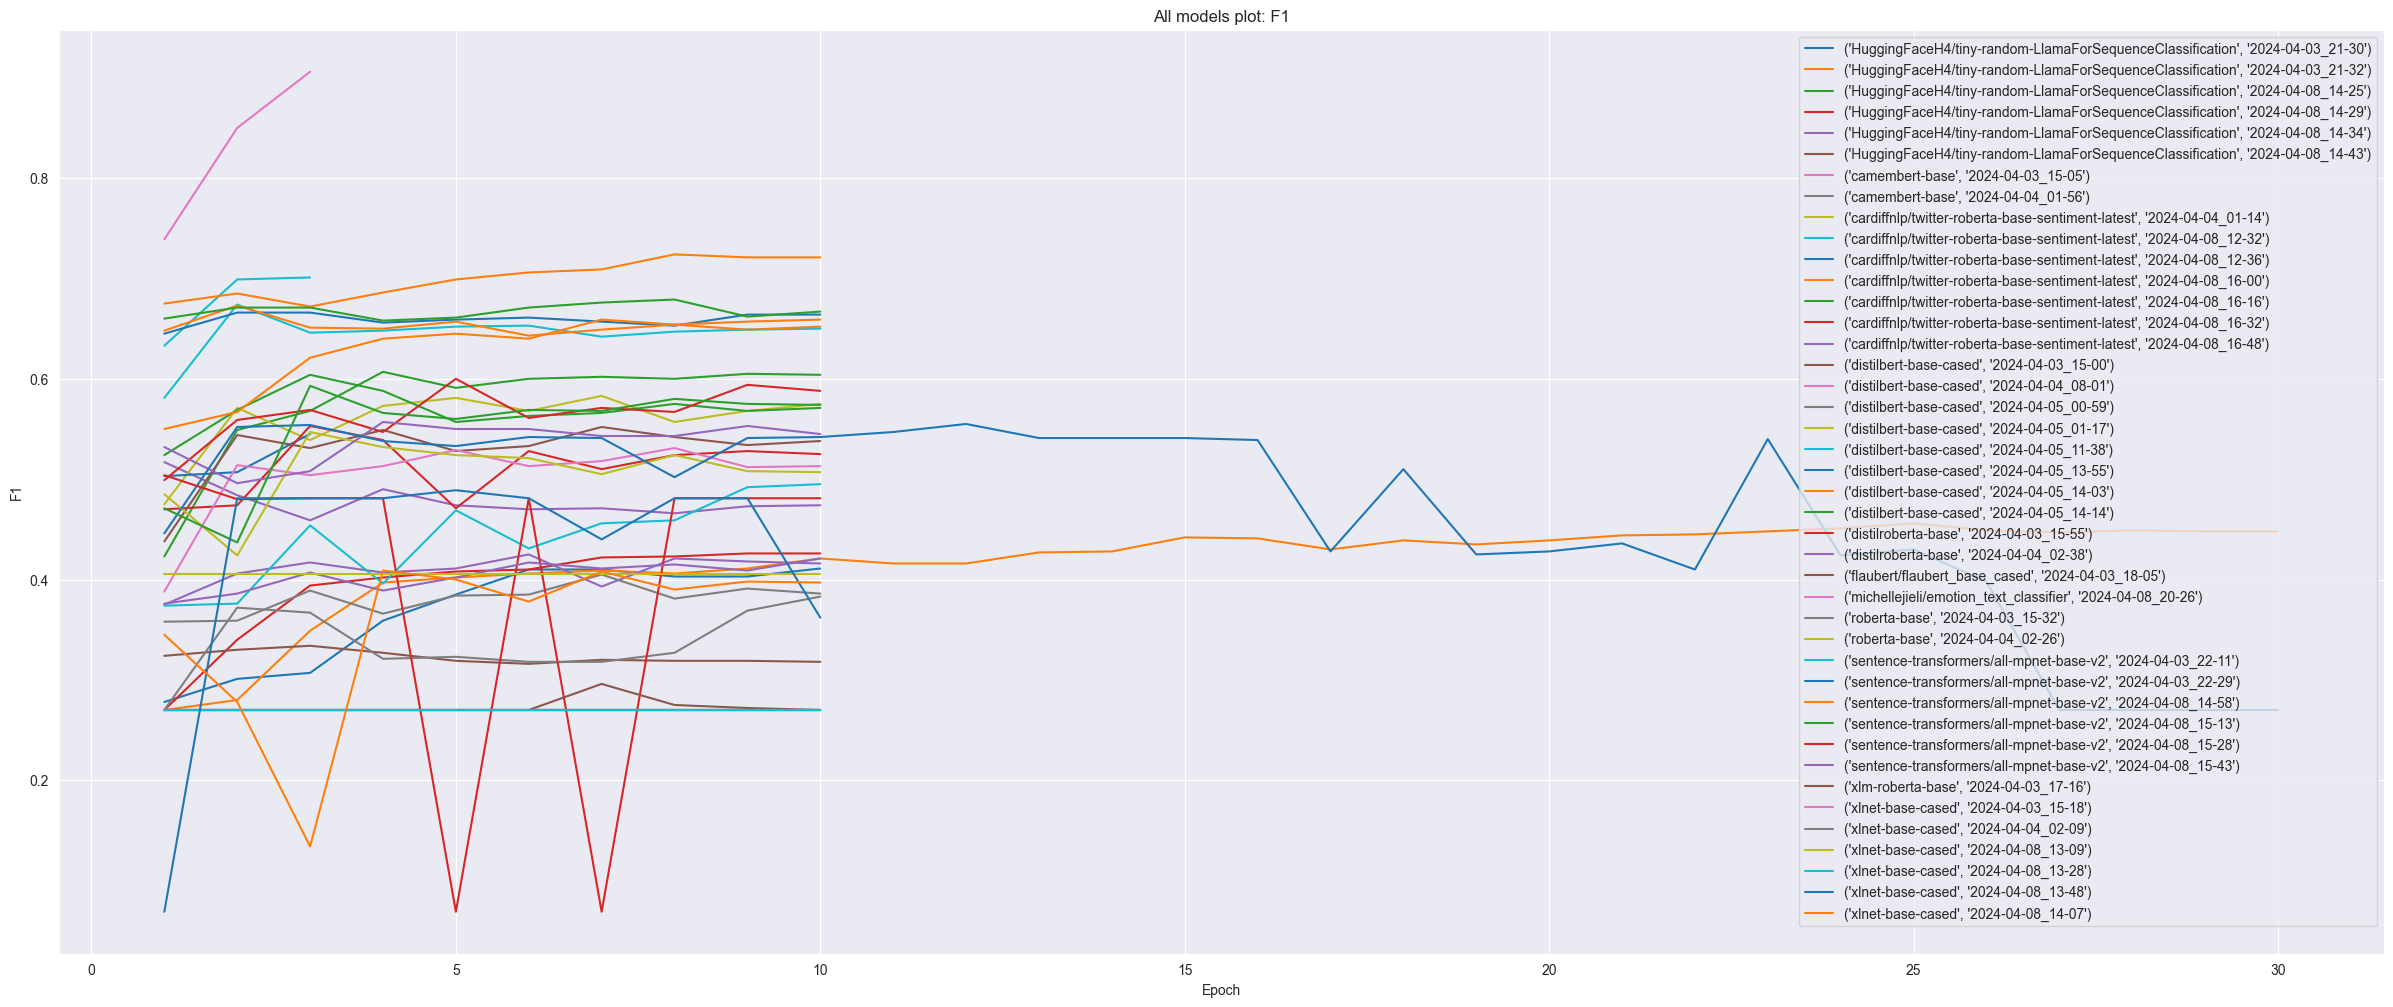

In [5]:
col_to_plot = 'F1'
grouped = df.groupby(['model', 'timestamp'])

plt.figure(figsize=(30,12))
for name, group_df in grouped:
    plt.plot(group_df['Epoch'], group_df[col_to_plot], label=name)

plt.xlabel('Epoch')
plt.ylabel(col_to_plot)
plt.title(f'All models plot: {col_to_plot}')
plt.legend()
plt.show()